In [34]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
pip install geopandas

In [ ]:
pip install mapclassify

In [ ]:
import geopandas
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_dir = 'drive/MyDrive/DAB103-new/'
ctdc = pd.read_csv(project_dir+ 'CTDC.tsv',sep='\t')
ctdc

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
city_num = ctdc.groupby(['citizenship']).size()
city_num

In [ ]:
city_num_df = pd.DataFrame({'CODE':city_num.index, 'num':city_num.values})
city_num_df

,CODE,num
0,AFG,550
1,ALB,440
2,ARE,20
3,ARG,100
4,ARM,20
...,...,...
123,VNM,780
124,YEM,20
125,ZAF,140
126,ZMB,40


In [ ]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,city_num_df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='num',ascending=False).reset_index()
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,num,latitude,longitude
0,80,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",18480,48.379433,31.165580
1,104,104256076,Asia,Philippines,PHL,801900.0,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",13000,12.879721,121.774017
2,83,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",10380,47.411631,28.369885
3,2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9690,37.090240,-95.712891
4,79,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",4180,53.709807,27.953389
...,...,...,...,...,...,...,...,...,...,...
116,60,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",20,23.424076,53.847818
117,29,360346,North America,Belize,BLZ,3088.0,"POLYGON ((-89.14308 17.80832, -89.15091 17.955...",10,17.189877,88.497600
118,59,10248069,Asia,Jordan,JOR,86190.0,"POLYGON ((35.54567 32.39399, 35.71992 32.70919...",10,30.585164,36.238414
119,23,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",10,8.537981,-80.782127


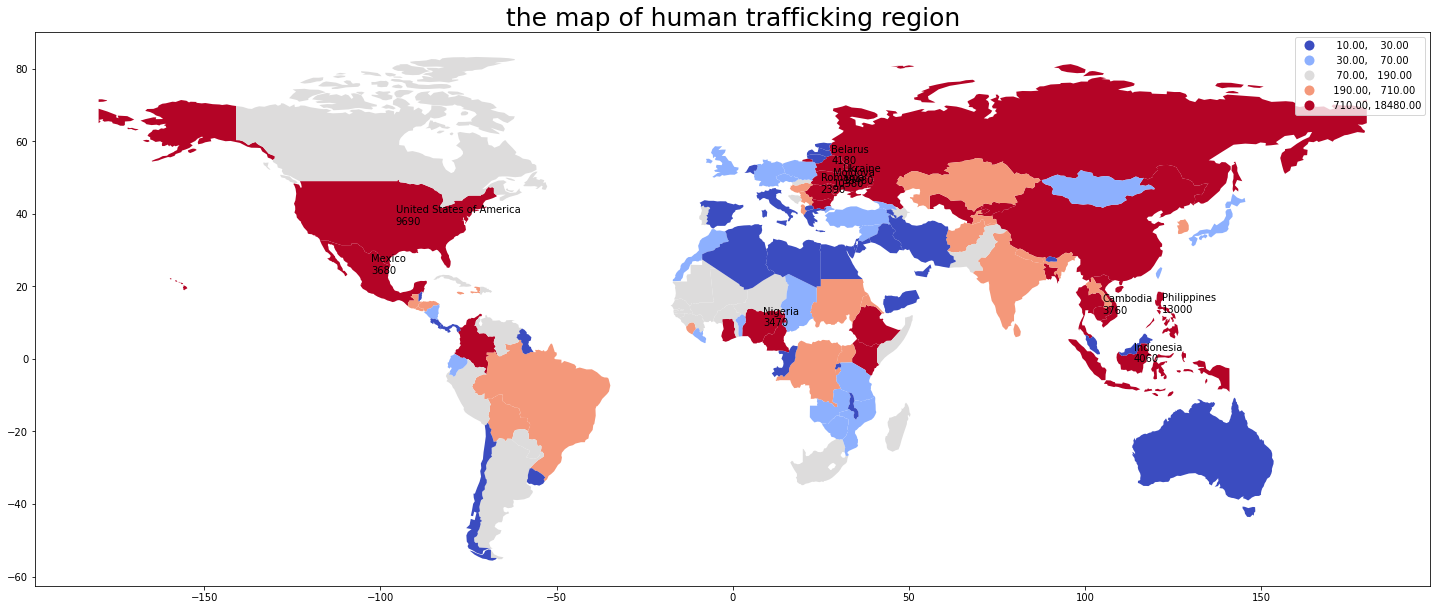

In [ ]:
# plot confirmed cases world map 
merge.plot(column='num', scheme="quantiles",
           figsize=(25, 20),
          legend=True,cmap='coolwarm')
plt.title('the map of human trafficking region',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.num[i]),size=10)
plt.show()